In [223]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
from scipy import stats
import os

os.chdir(r'E:\data processing')

In [224]:
def read_data(file_path, file_format='csv'):
    """
    Read data from different file formats such as CSV, Excel, or JSON.

    Parameters:
    - file_path (str): The path to the file.
    - file_format (str): The format of the file (default is 'csv').

    Returns:
    - pd.DataFrame: The loaded dataset.
    """
    supported_formats = ['csv', 'excel', 'json']
    if file_format.lower() not in supported_formats:
        raise ValueError(f"Unsupported file format. Supported formats: {', '.join(supported_formats)}.")

    if file_format == 'csv':
        return pd.read_csv(file_path)
    elif file_format == 'excel':
        return pd.read_excel(file_path)
    elif file_format == 'json':
        return pd.read_json(file_path)

def drop_columns(data):
    print('wtite the columns to be droped: ')
    droped_columns=[]
    while True:
        droped_column = input('Write the column names you want to drop from the data. If you finish, press q: ')
        
        if droped_column == 'q':
            break
        droped_columns.append(droped_column)
    return data.drop(columns=droped_columns, axis=1)
    
    
def statical_summary(data):
    print(data.head())
    print("##################Describeing the Data#################")
    print(data.describe())
    print("##################Columns in the Data#################")
    print(data.columns)
    
    
    
    print("##################Grouping the data by spacific columns#################")
    column_list = []
    showed_columns=[]
    while True:
        grouped_column = input('Write the column names you want to group the data with. If you finish, press q: ')
        
        
        if grouped_column == 'q':
            while True:
                showed_column = input('Write the column name to be ((###show the grouped data with###))(if you finsh press q to exist): ')
                if showed_column == 'q':
                    break
                showed_columns.append(showed_column)
            break
        column_list.append(grouped_column)
        
    # Grouping the data with the specified columns
    grouped_data = data.groupby(column_list)[showed_columns]
    
    # Printing each group
    for group_name, group_data in grouped_data:
        print(f"Group: {group_name}")
        print(group_data.mean())
        print("\n")
    
    
    
    print("##################Counting number of values in  specific columns#################")
    value_counts_list=[]
    print("write the columns you want to count it's values: ")
    while True:
        grouped_columns=input('write the columns to be Counted if you finsh press q ')
        if grouped_columns=='q':
            break
        value_counts_list.append(grouped_columns)
    print('Counting the data with the written columns ')
    for column in value_counts_list:
        print(data[column].value_counts())
        

def Handeling_missing_values(data):
    print('num of null in the data given : ')
    print(data.isnull().sum())
    
     # Separate numerical and categorical columns
    numerical_columns = data.select_dtypes(include=['number']).columns
    categorical_columns = data.select_dtypes(exclude=['number']).columns
    
    # Fill null values with mean for numerical columns
    for col in numerical_columns:
        if data[col].isnull().any():
            data[col].fillna(data[col].mean(), inplace=True)
    
    # Fill null values with median for categorical columns
    for col in categorical_columns:
        if data[col].isnull().any():
            data[col].fillna(data[col].mode()[0], inplace=True)

    print('After filling null values:')
    print(data.isnull().sum())

def Categorical_Data_Encoding(data):
    
    # Initialize LabelEncoder
    label_enc = LabelEncoder()

    # Separate numerical and categorical columns
    categorical_columns = data.select_dtypes(exclude=['number']).columns

    # Encode all categorical columns using LabelEncoder
    for col in categorical_columns:
        data[col] = label_enc.fit_transform(data[col])
    
    return data



def remove_outliers(data, threshold=3):
    # Find z-scores for each numerical column
    z_scores = stats.zscore(data.select_dtypes(include=['number']))
    
    # Absolute z-scores
    abs_z_scores = np.abs(z_scores)
    
    # Identify outliers
    outlier_rows, outlier_cols = np.where(abs_z_scores > threshold)
    
    # Remove outliers
    clean_data = data.drop(outlier_rows)
    
    # Overwrite the original data with clean data
    clean_data.to_csv('your_dataset.csv', index=False)
    
    print("Outliers removed and clean data saved in the same file.")
    

In [225]:
def generate_countplot(df, columns, hue=None):
    if hue:
        sns.catplot(data=df, x=columns[0], hue=hue, kind='count', aspect=2)
        plt.title(f'Count Plot for {columns[0]} with Hue {hue}')
    else:
        sns.catplot(data=df, x=columns[0], kind='count', aspect=2)
        plt.title(f'Count Plot for {columns[0]}')
    plt.show()

    
def plot_histogram(df, col, bins=20, title=None, xlabel=None, ylabel=None):
    """
    Function to plot histogram for a specific column in a DataFrame.

    Parameters:
        df (DataFrame): The pandas DataFrame.
        col (str): The column name for which the histogram is to be plotted.
        bins (int or sequence of scalars, optional): Specifies the number of bins or the bin edges. Default is 10.
        title (str, optional): The title of the histogram. Default is None.
        xlabel (str, optional): The label for the x-axis. Default is None.
        ylabel (str, optional): The label for the y-axis. Default is None.
    """
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.hist(df[col], bins=bins)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [226]:
df=read_data('listings.csv')

In [227]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [228]:
important_columns=[ 'source','host_is_superhost','host_total_listings_count', 'host_identity_verified',
                   'latitude','beds', 'price','has_availability','instant_bookable',
                   'longitude', 'property_type', 'room_type','accommodates']

In [229]:
df=df[important_columns]

In [230]:
df.head()

,source,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,beds,price,has_availability,instant_bookable,longitude,property_type,room_type,accommodates
0,previous scrape,f,1,t,37.99443,1.0,$20.00,t,f,23.73688,Private room in rental unit,Private room,2
1,previous scrape,f,2,t,37.97919,2.0,$293.00,t,f,23.74532,Entire rental unit,Entire home/apt,4
2,city scrape,t,1,t,37.96600,2.0,$60.00,t,t,23.72717,Entire condo,Entire home/apt,3
3,city scrape,f,1,t,37.97589,1.0,$93.00,t,t,23.73275,Entire rental unit,Entire home/apt,2
4,city scrape,f,3,t,37.97922,3.0,$119.00,t,f,23.72470,Entire rental unit,Entire home/apt,4


In [231]:
Handeling_missing_values(df)

num of null in the data given : 
source                         0
host_is_superhost              4
host_total_listings_count      0
host_identity_verified         0
latitude                       0
beds                         165
price                        366
has_availability             366
instant_bookable               0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
dtype: int64
After filling null values:
source                       0
host_is_superhost            0
host_total_listings_count    0
host_identity_verified       0
latitude                     0
beds                         0
price                        0
has_availability             0
instant_bookable             0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
dtype: int64


In [232]:
df.head()

,source,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,beds,price,has_availability,instant_bookable,longitude,property_type,room_type,accommodates
0,previous scrape,f,1,t,37.99443,1.0,$20.00,t,f,23.73688,Private room in rental unit,Private room,2
1,previous scrape,f,2,t,37.97919,2.0,$293.00,t,f,23.74532,Entire rental unit,Entire home/apt,4
2,city scrape,t,1,t,37.96600,2.0,$60.00,t,t,23.72717,Entire condo,Entire home/apt,3
3,city scrape,f,1,t,37.97589,1.0,$93.00,t,t,23.73275,Entire rental unit,Entire home/apt,2
4,city scrape,f,3,t,37.97922,3.0,$119.00,t,f,23.72470,Entire rental unit,Entire home/apt,4


In [233]:
list_price=df['price']
df2=Categorical_Data_Encoding(drop_columns(df))
df2['price']=list_price
df2.head()

wtite the columns to be droped: 
Write the column names you want to drop from the data. If you finish, press q: price
Write the column names you want to drop from the data. If you finish, press q: q


,source,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,beds,has_availability,instant_bookable,longitude,property_type,room_type,accommodates,price
0,1,0,1,1,37.99443,1.0,1,0,23.73688,30,2,2,$20.00
1,1,0,2,1,37.97919,2.0,1,0,23.74532,13,0,4,$293.00
2,0,1,1,1,37.96600,2.0,1,1,23.72717,7,0,3,$60.00
3,0,0,1,1,37.97589,1.0,1,1,23.73275,13,0,2,$93.00
4,0,0,3,1,37.97922,3.0,1,0,23.72470,13,0,4,$119.00


In [234]:
df2.columns

df2['price']

0         $20.00
1        $293.00
2         $60.00
3         $93.00
4        $119.00
          ...   
13177    $151.00
13178     $54.00
13179    $214.00
13180     $60.00
13181     $72.00
Name: price, Length: 13182, dtype: object

In [235]:
remove_outliers(df2)
df2.head()

Outliers removed and clean data saved in the same file.


,source,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,beds,has_availability,instant_bookable,longitude,property_type,room_type,accommodates,price
0,1,0,1,1,37.99443,1.0,1,0,23.73688,30,2,2,$20.00
1,1,0,2,1,37.97919,2.0,1,0,23.74532,13,0,4,$293.00
2,0,1,1,1,37.96600,2.0,1,1,23.72717,7,0,3,$60.00
3,0,0,1,1,37.97589,1.0,1,1,23.73275,13,0,2,$93.00
4,0,0,3,1,37.97922,3.0,1,0,23.72470,13,0,4,$119.00


In [236]:
# Replace ',' and '$' with ''
df2['price'] = df2['price'].str.replace(',', '')
df2['price'] = df2['price'].str.replace('$', '').astype(float)

print(df2['price'])




0         20.0
1        293.0
2         60.0
3         93.0
4        119.0
         ...  
13177    151.0
13178     54.0
13179    214.0
13180     60.0
13181     72.0
Name: price, Length: 13182, dtype: float64


In [237]:
print(df2.dtypes)

source                         int32
host_is_superhost              int32
host_total_listings_count      int64
host_identity_verified         int32
latitude                     float64
beds                         float64
has_availability               int32
instant_bookable               int32
longitude                    float64
property_type                  int32
room_type                      int32
accommodates                   int64
price                        float64
dtype: object


source                       0
host_is_superhost            0
host_total_listings_count    0
host_identity_verified       0
latitude                     0
beds                         0
has_availability             0
instant_bookable             0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
price                        0
dtype: int64


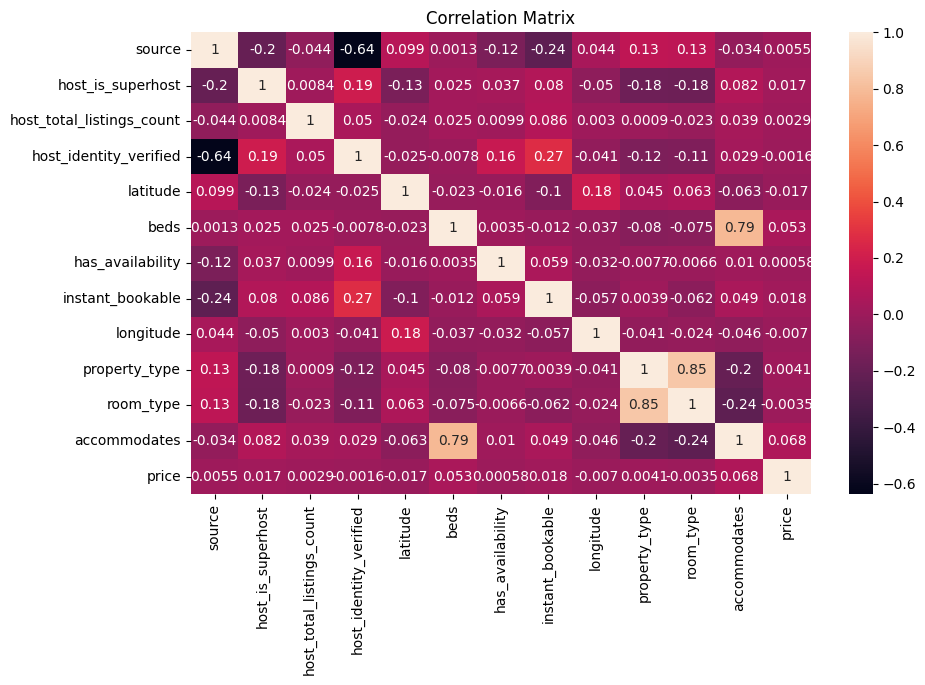

Correlation with the 'price' column:
price                        1.000000
accommodates                 0.068110
beds                         0.052636
instant_bookable             0.018404
host_is_superhost            0.016689
source                       0.005505
property_type                0.004060
host_total_listings_count    0.002890
has_availability             0.000580
host_identity_verified      -0.001640
room_type                   -0.003504
longitude                   -0.007041
latitude                    -0.017185
Name: price, dtype: float64

The most important columns related to the 'price' column:
accommodates                 0.068110
beds                         0.052636
instant_bookable             0.018404
host_is_superhost            0.016689
source                       0.005505
property_type                0.004060
host_total_listings_count    0.002890
has_availability             0.000580
host_identity_verified      -0.001640
room_type                   -0.003504
lo

In [238]:
df_numeric = df2.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
print(df_numeric.isna().sum())

# Drop rows with NaN values
df_numeric.dropna(inplace=True)

# Perform correlation analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Calculate correlation with the 'price' column
price_correlation = df2.corr()['price'].sort_values(ascending=False)

# Display the correlation values
print("Correlation with the 'price' column:")
print(price_correlation)

# Extract the most important columns (excluding the 'price' column itself)
most_important_columns = price_correlation[price_correlation.index != 'price']

# Display the most important columns related to price
print("\nThe most important columns related to the 'price' column:")
print(most_important_columns)

In [239]:
print('so it is appear from the correlation graph and the sorted result that the most there columns related to the price column is (accommodates),(beds) ,(instant_bookable)')

so it is appear from the correlation graph and the sorted result that the most there columns related to the price column is (accommodates),(beds) ,(instant_bookable)


<Figure size 3000x1500 with 0 Axes>

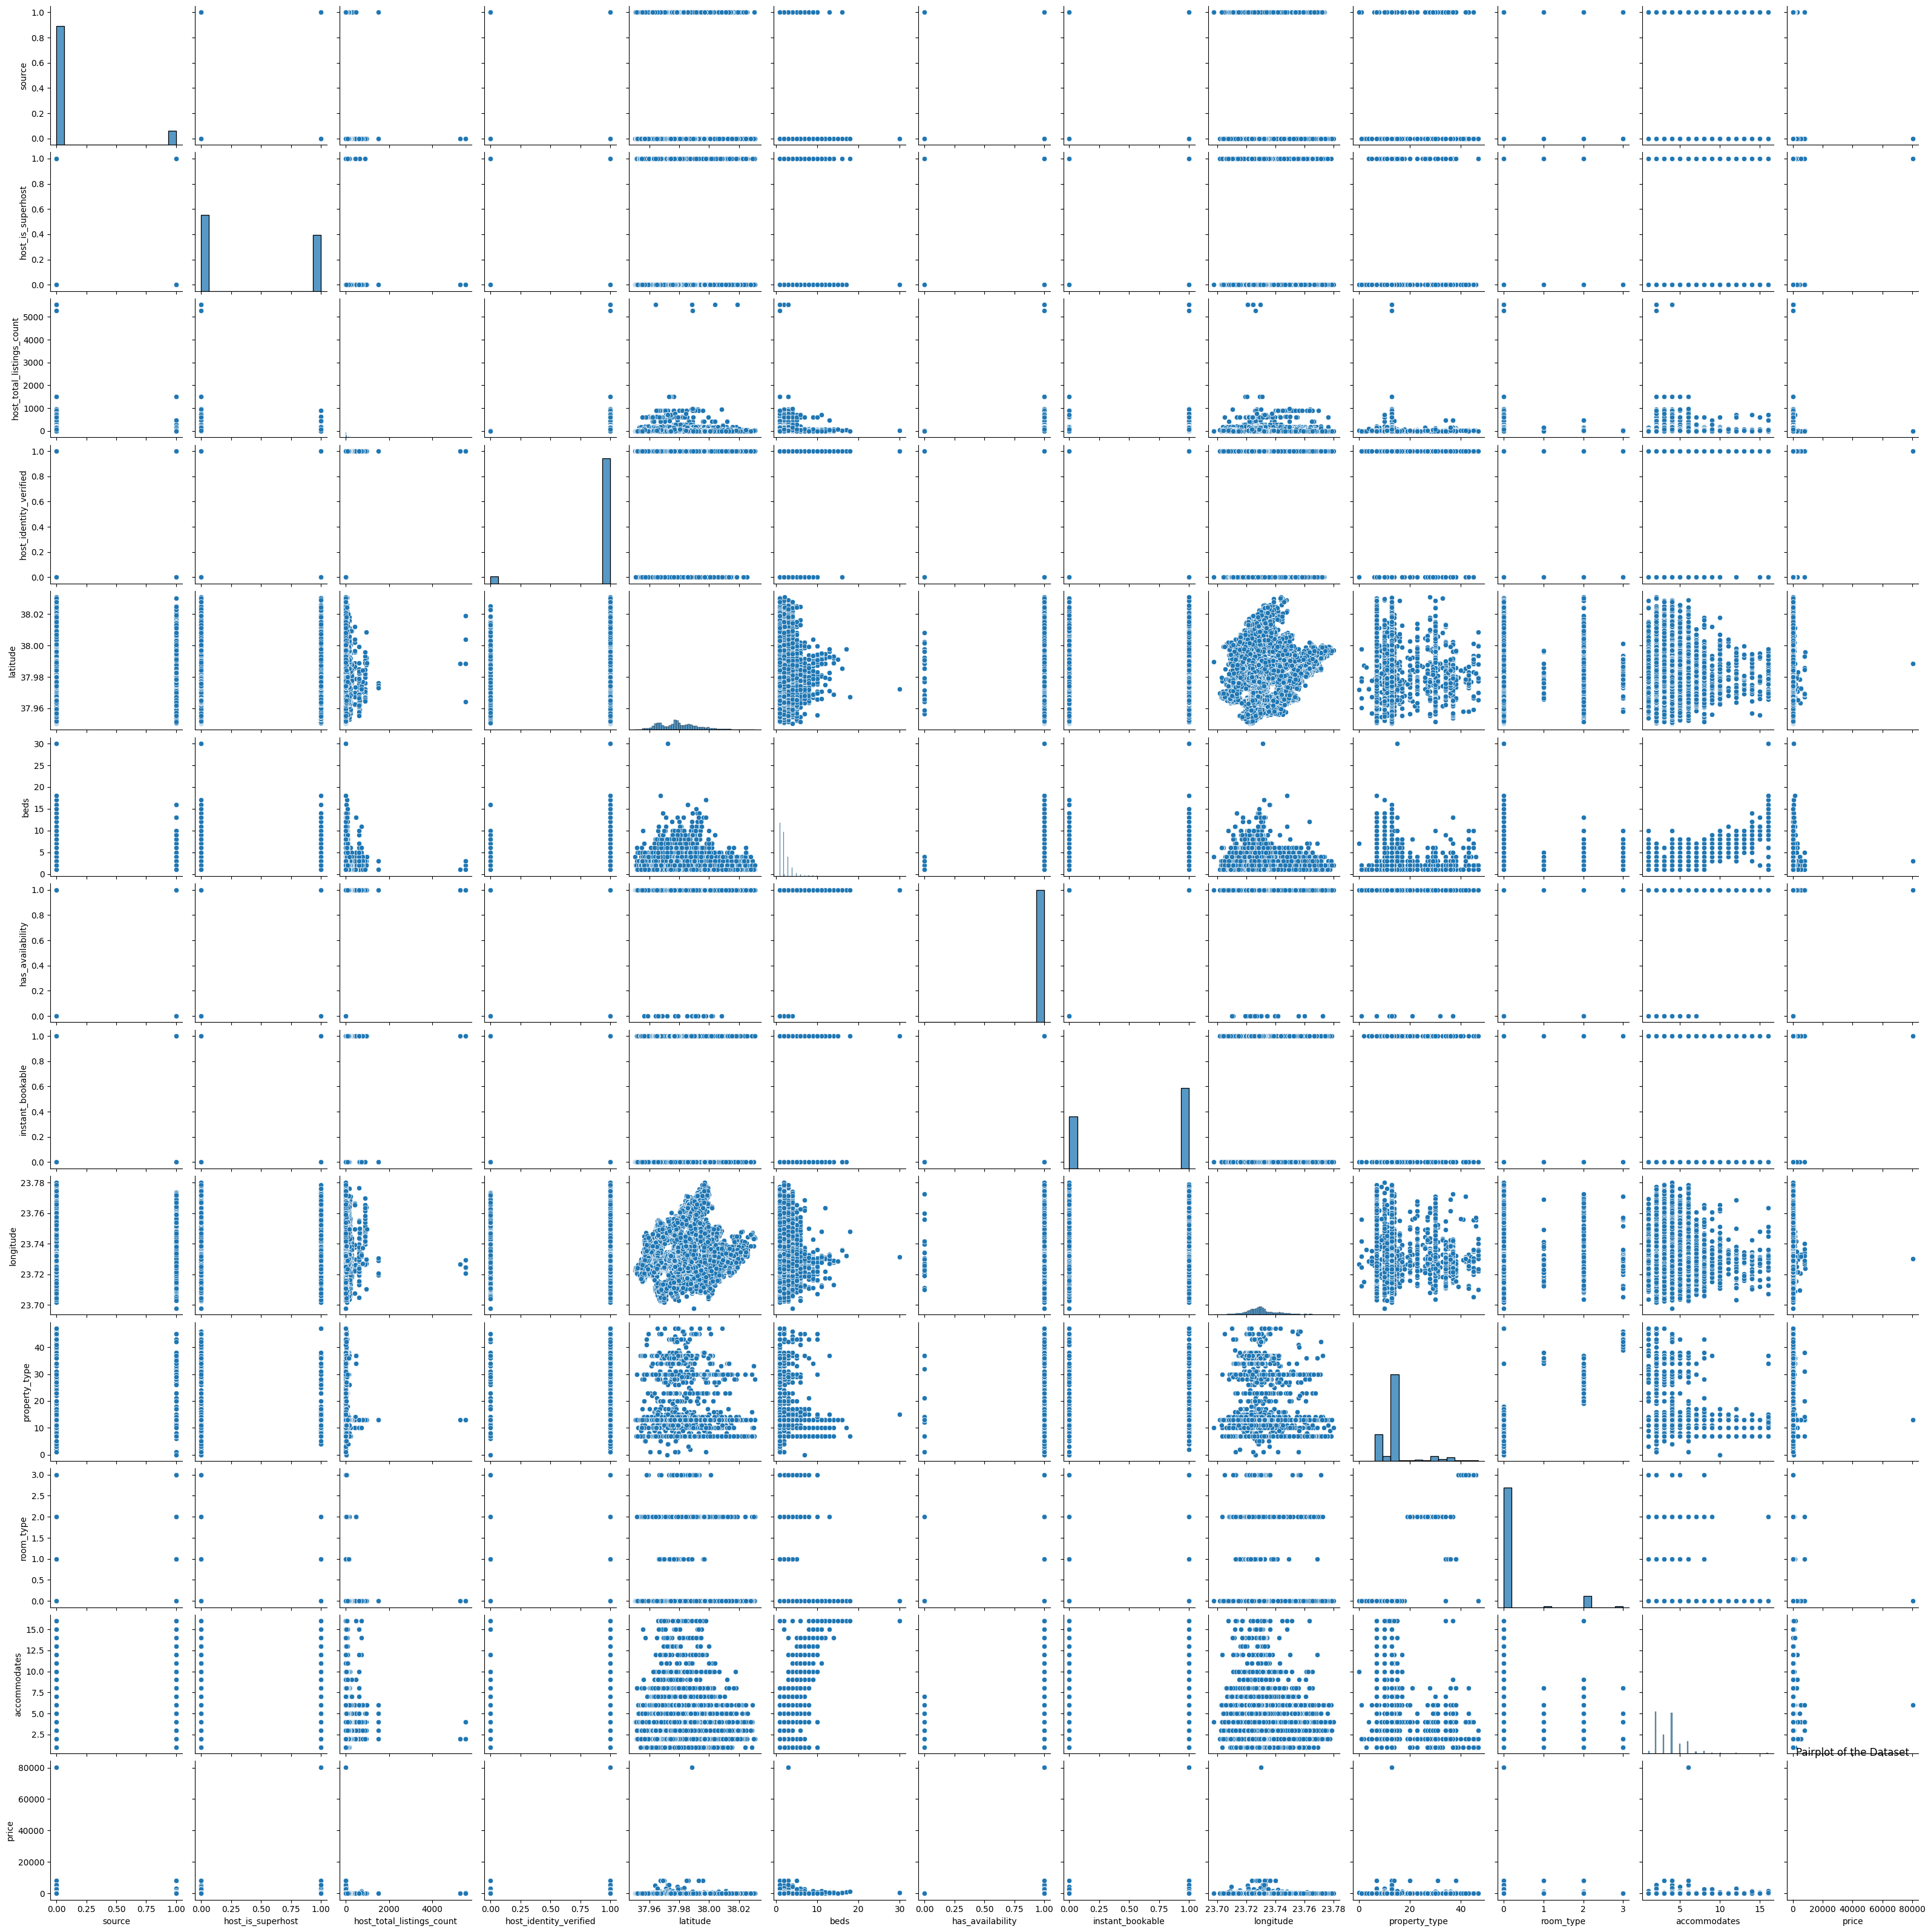

In [240]:
# Set the figure size for the pairplot
plt.figure(figsize=(30, 15))

# Create pairplot
sns.pairplot(df2)

plt.title('Pairplot of the Dataset')
plt.show()

<h1> visualization<h1>

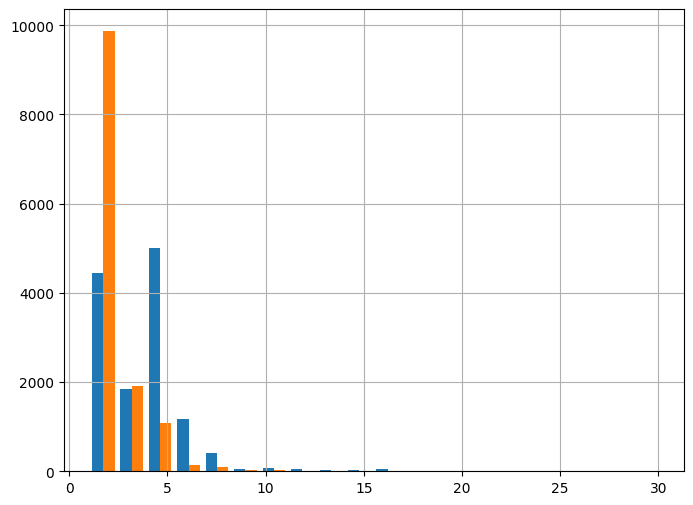

In [241]:
plot_histogram(df2,['accommodates','beds'])

In [242]:
print('it is clear from the histogram the relation between the number of beds and accommodates ')

it is clear from the histogram the relation between the number of beds and accommodates 


In [243]:
df2.columns


Index(['source', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'latitude', 'beds', 'has_availability',
       'instant_bookable', 'longitude', 'property_type', 'room_type',
       'accommodates', 'price'],
      dtype='object')

draw scatter and distribution for the values: 


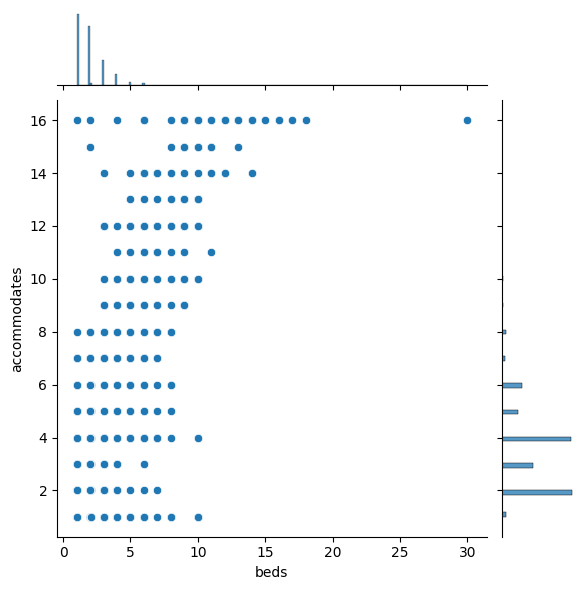

In [244]:
print('draw scatter and distribution for the values: ')
sns.jointplot(x='beds', y='accommodates',data=df,kind='scatter')

In [245]:
print('this graph show that accommodates with values 2 and 4 really related with beds from 1 to 5')

this graph show that accommodates with values 2 and 4 really related with beds from 1 to 5


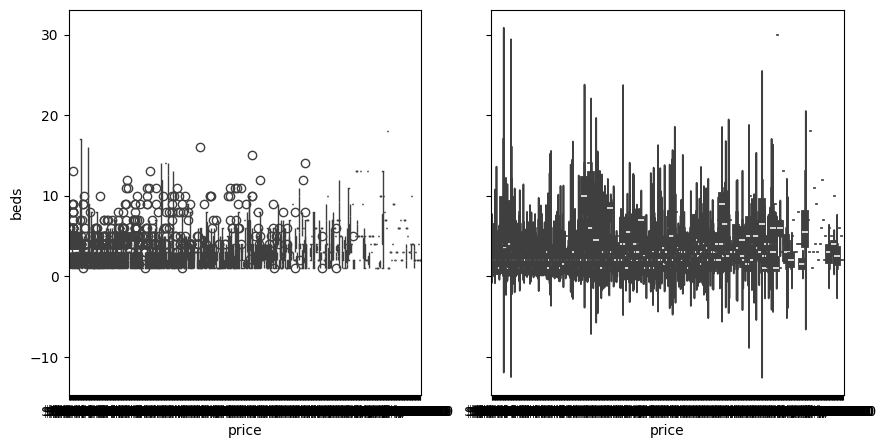

In [246]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
sns.boxplot(x='price', y='beds', data=df, ax=axes[0])
sns.violinplot(x='price', y='beds', data=df, ax=axes[1])
plt.show()


In [247]:
print('values from 0 to 10 in beds related to price and had high values')

values from 0 to 10 in beds related to price and had high values


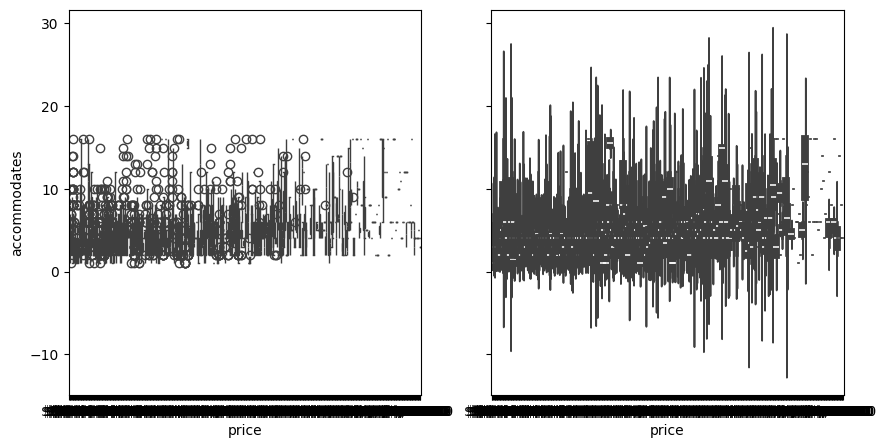

In [248]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
sns.boxplot(x='price', y='accommodates', data=df, ax=axes[0])
sns.violinplot(x='price', y='accommodates', data=df, ax=axes[1])
plt.show()


In [249]:
print('values from 0 to 15 in accommodates related to price and had high values')

values from 0 to 15 in accommodates related to price and had high values


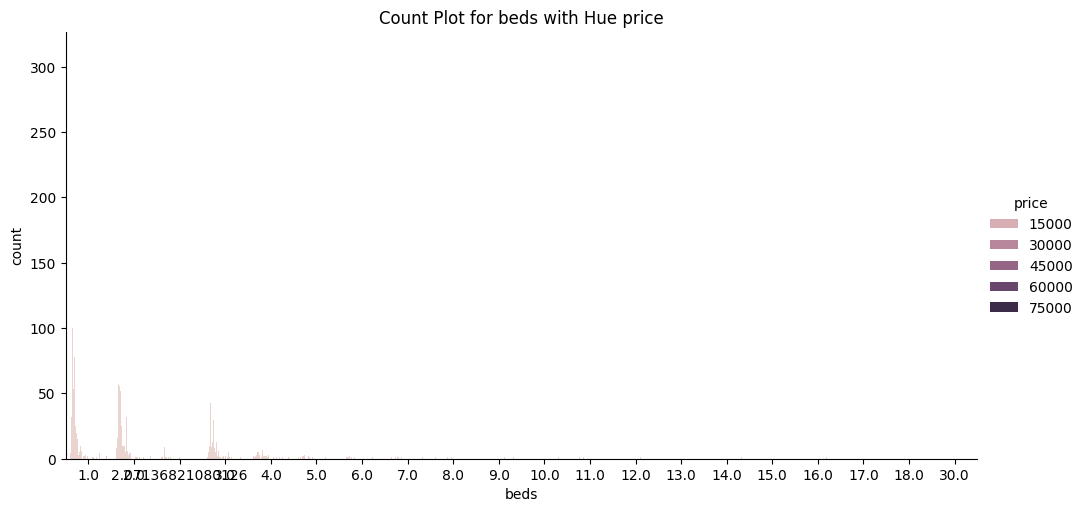

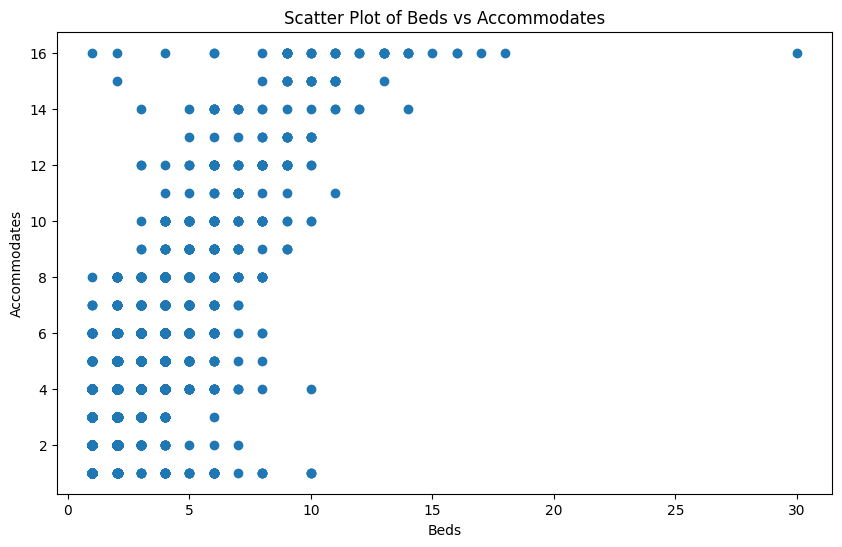

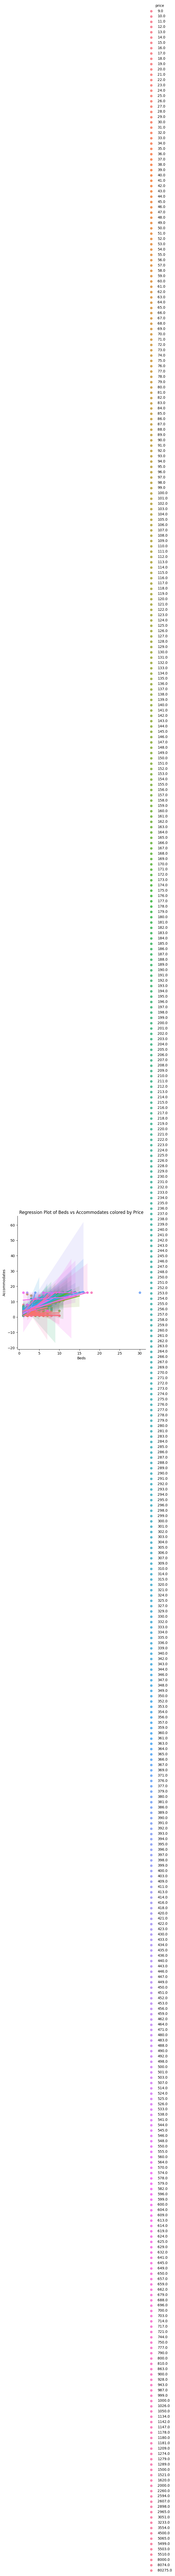

In [250]:
# Generate count plot for 'beds' and 'accommodates' colored by 'price'
generate_countplot(df2, ['beds', 'accommodates'], hue='price')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['beds'], df2['accommodates'])
plt.xlabel('Beds')
plt.ylabel('Accommodates')
plt.title('Scatter Plot of Beds vs Accommodates')
plt.show()

# Scatter plot with regression line, colored by 'price'
sns.lmplot(x='beds', y='accommodates', data=df2, hue='price', height=6)
plt.xlabel('Beds')
plt.ylabel('Accommodates')
plt.title('Regression Plot of Beds vs Accommodates colored by Price')
plt.show()

In [251]:
print('first Graph{count plot for beds with Hue price} showes that range of beds from 1 to 50 have prices between 15000$ to 30000$')

first Graph{count plot for beds with Hue price} showes that range of beds from 1 to 50 have prices between 15000$ to 30000$


In [252]:
print('Second graph {scatter plot of Beds Vs Accommodates} values of beds from 1 to 10 with high values with the feature Accommodates from 0 to 16 ')

Second graph {scatter plot of Beds Vs Accommodates} values of beds from 1 to 10 with high values with the feature Accommodates from 0 to 16 


In [253]:
print('third graph {Regression Plot of Beds vs Accommodates colored by Price} by this graph by colored price we ensure that beds from 1 to 10 with high values with the feature Accommodates from 0 to 16 has high price which colored with Pink and the value started from 600.00')

third graph {Regression Plot of Beds vs Accommodates colored by Price} by this graph by colored price we ensure that beds from 1 to 10 with high values with the feature Accommodates from 0 to 16 has high price which colored with Pink and the value started from 600.00
